# Загрузка и изучение данных

In [2]:
from sklearn.datasets import load_linnerud
linnerud_dataset = load_linnerud()

In [3]:
print("Ключи diabetes_dataset: \n{}".format(linnerud_dataset.keys()))

Ключи diabetes_dataset: 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [7]:
print(linnerud_dataset['DESCR'][:1600] + "\n...")

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|
...


In [9]:
print("Названия признаков: \n{}".format(linnerud_dataset['feature_names']))

Названия признаков: 
['Chins', 'Situps', 'Jumps']


In [11]:
print("Форма массива data: {}".format(linnerud_dataset['data'].shape))

Форма массива data: (20, 3)


In [13]:
print("Первые пять (20) строк массива data:\n{}".format(linnerud_dataset['data'][:20]))

Первые пять (20) строк массива data:
[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]


In [16]:
print("Названия ответов: {}".format(linnerud_dataset['target_names']))

Названия ответов: ['Weight', 'Waist', 'Pulse']


In [18]:
print("Тип массива target: {}".format(type(linnerud_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [19]:
print("Форма массива target: {}".format(linnerud_dataset['target'].shape))

Форма массива target: (20, 3)


In [20]:
print("Ответы:\n{}".format(linnerud_dataset['target']))

Ответы:
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


# Метрики эффективности: обучающий и тестовые наборы

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(linnerud_dataset['data'], linnerud_dataset['target'],
                                                    random_state=0)

In [22]:
print("форма массива x_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива x_train: (15, 3)
форма массива y_train: (15, 3)


In [23]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (5, 3)
форма массива y_test: (5, 3)


# KNeighborsRegressor

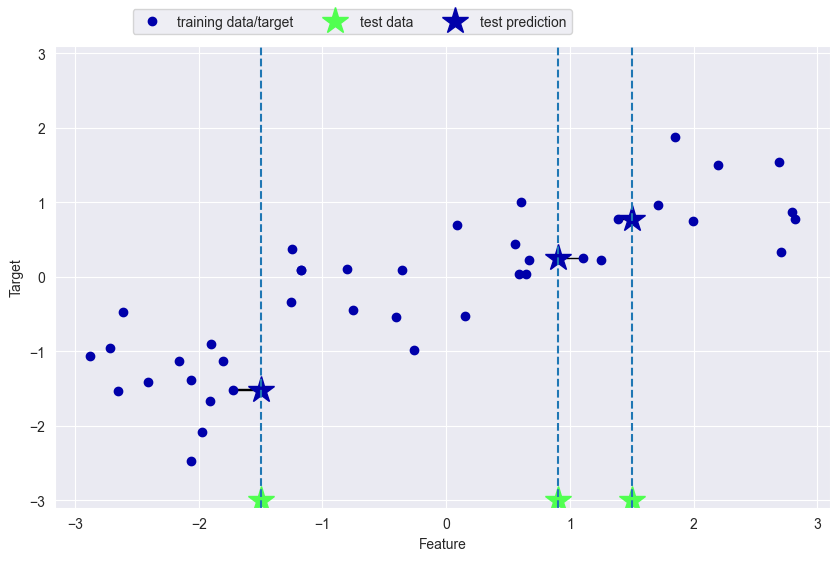

In [24]:
import mglearn

mglearn.plots.plot_knn_regression(n_neighbors=1)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

reg =KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [27]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[[159.          33.          56.        ]
 [186.66666667  36.          57.33333333]
 [185.          36.33333333  58.        ]
 [179.          34.33333333  49.33333333]
 [180.          35.66666667  59.33333333]]


In [28]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: -0.57


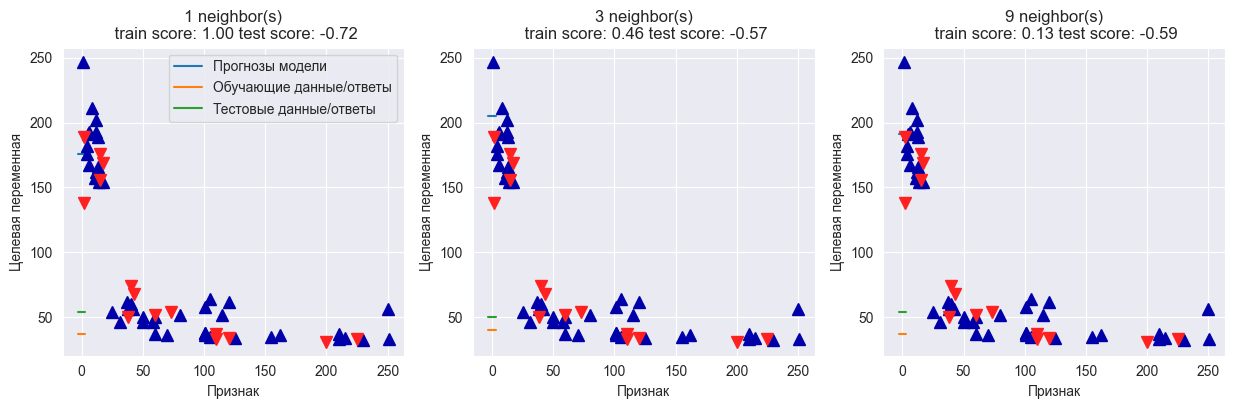

In [29]:
import numpy as np
from matplotlib import pyplot as plt
# Анализ KNeighborsRegressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 900).reshape(-1, 3)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
    axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы", "Тестовые данные/ответы"], loc='best')

# Линейная модель регрессии (метод наименьших квадратов)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.38
Правильность на тестовом наборе: -1.24


In [31]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[-2.55388075e+00 -1.87334813e-01  1.55632934e-01]
 [-3.25317265e-01 -3.72155297e-02  3.22483661e-02]
 [ 4.66624875e-01 -3.84735037e-03 -2.35434971e-03]]
lr.intercept_: [221.27779424  41.8405461   51.37162613]


# Гребневая регрессия

In [32]:
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

ridge = Ridge().fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

print("\nRidge регрессия:")
print("Правильность на обучающем наборе: {:.3f}".format(ridge_train_score))
print("Правильность на тестовом наборе: {:.3f}".format(ridge_test_score))
print("Среднеквадратичная ошибка: {:.2f}".format(ridge_mse))


Ridge регрессия:
Правильность на обучающем наборе: 0.382
Правильность на тестовом наборе: -1.228
Среднеквадратичная ошибка: 378.50


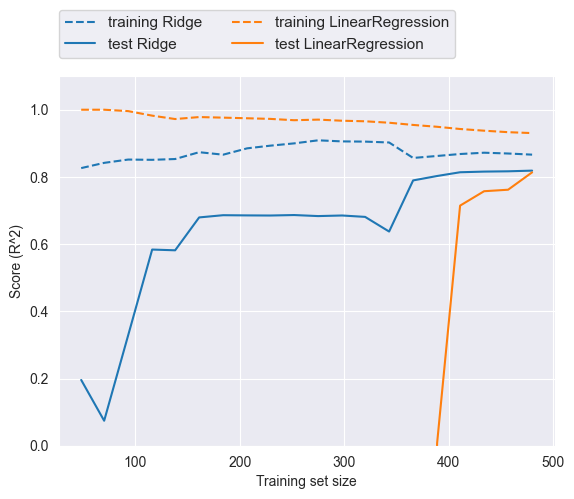

In [34]:
mglearn.plots.plot_ridge_n_samples()

# Лассо

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print("\nLasso регрессия:")
print("Правильность на обучающем наборе: {:.3f}".format(lasso_train_score))
print("Правильность на тестовом наборе: {:.3f}".format(lasso_test_score))
print("Среднеквадратичная ошибка: {:.2f}".format(lasso_mse))


Lasso регрессия:
Правильность на обучающем наборе: 0.376
Правильность на тестовом наборе: -0.983
Среднеквадратичная ошибка: 366.84


In [36]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ !=0)))

Правильность на обучающем наборе: 0.38
Правильность на тестовом наборе: -1.24
Количество использованных признаков: 9


In [37]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso0001.coef_ !=0)))

Правильность на обучающем наборе: 0.38
Правильность на тестовом наборе: -1.24
Количество использованных признаков: 9


# Обобщение и вывод